# 30254 - ML for Public Policy HW3 - Nora Hajjar

## Machine Learning Pipeline Version 2 (HW3): 
This document is an example of running the ML pipeline for one specific model, in this case a decision tree classifier. Demo shows how the functions in accompanying file pipeline.py work

### LOAD DATA

In [1]:
#import pipeline.py file
%load_ext autoreload
%autoreload 2
import pipeline_hw3 as p

import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn import preprocessing, cross_validation, svm, metrics, tree, decomposition, svm
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier, OrthogonalMatchingPursuit, RandomizedLogisticRegression
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import ParameterGrid
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
import random
import matplotlib.pyplot as plt
from scipy import optimize
import time
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.model_selection import cross_val_score


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
df = p.load_data('projects_2012_2013.csv')

### EXPLORE DATA

In [4]:
p.get_sum_stats(df)

,school_ncesid,school_latitude,school_longitude,total_price_including_optional_support,students_reached
count,1.157430e+05,124976.000000,124976.000000,124976.000000,124917.000000
mean,2.448448e+11,36.827284,-95.859299,654.011811,95.445760
std,1.644728e+11,4.963669,18.392876,1098.015854,163.481912
min,1.000050e+10,18.249140,-171.690554,92.000000,1.000000
25%,6.344101e+10,33.872504,-117.806418,345.810000,23.000000
50%,2.200870e+11,36.617410,-90.101563,510.500000,30.000000
75%,3.704880e+11,40.676156,-80.713740,752.960000,100.000000
max,6.100010e+11,65.672562,-66.628036,164382.840000,12143.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a09d596d8>,
      dtype=object)

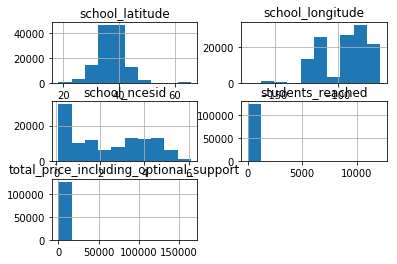

In [5]:
p.get_hist(df)

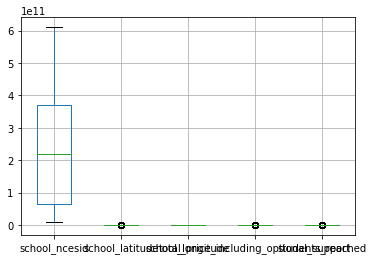

In [6]:
p.get_outliers(df)

### CLEAN DATA

In [7]:
#show null counts
null_counts = p.check_null_counts(df)
null_counts

projectid                                     0
teacher_acctid                                0
schoolid                                      0
school_ncesid                              9233
school_latitude                               0
school_longitude                              0
school_city                                   0
school_state                                  0
school_metro                              15224
school_district                             172
school_county                                 0
school_charter                                0
school_magnet                                 0
teacher_prefix                                0
primary_focus_subject                        15
primary_focus_area                           15
secondary_focus_subject                   40556
secondary_focus_area                      40556
resource_type                                17
poverty_level                                 0
grade_level                             

In [42]:
#get null columns
null_cols = p.get_null_cols(df, null_counts)
null_cols

['school_ncesid',
 'school_metro',
 'school_district',
 'primary_focus_subject',
 'primary_focus_area',
 'secondary_focus_subject',
 'secondary_focus_area',
 'resource_type',
 'grade_level',
 'students_reached']

In [43]:
#fill null cols
p.fill_null_cols(df, ['students_reached'])

In [44]:
#nulls were successfully filled with the mean of the column
p.check_null_counts(df)

#notes on nulls pertaining to this data specifically:
#school_ncesid: there are nulls, if needed ids, would need to do a lookup
#school_metro: to fill this in we will need additional data - census data? Out of scope currently
#school_district: same, need census data

#drop NA values for:
#primary_focus_subject
#primary_focus_area
#resource_type
#grade_level

projectid                                       0
teacher_acctid                                  0
schoolid                                        0
school_ncesid                                9104
school_latitude                                 0
school_longitude                                0
school_city                                     0
school_state                                    0
school_metro                                15129
school_district                                 0
school_county                                   0
school_charter                                  0
school_magnet                                   0
teacher_prefix                                  0
primary_focus_subject                           0
primary_focus_area                              0
secondary_focus_subject                     40459
secondary_focus_area                        40459
resource_type                                   0
poverty_level                                   0


In [45]:
df.dropna(subset=['primary_focus_subject', 'primary_focus_area','resource_type', 'grade_level', 'school_district'], inplace=True)

In [46]:
p.check_null_counts(df)

projectid                                       0
teacher_acctid                                  0
schoolid                                        0
school_ncesid                                9104
school_latitude                                 0
school_longitude                                0
school_city                                     0
school_state                                    0
school_metro                                15129
school_district                                 0
school_county                                   0
school_charter                                  0
school_magnet                                   0
teacher_prefix                                  0
primary_focus_subject                           0
primary_focus_area                              0
secondary_focus_subject                     40459
secondary_focus_area                        40459
resource_type                                   0
poverty_level                                   0


In [47]:
df['date_posted'] =  pd.to_datetime(df['date_posted'])
df['datefullyfunded'] =  pd.to_datetime(df['datefullyfunded'])
df.dtypes

projectid                                            object
teacher_acctid                                       object
schoolid                                             object
school_ncesid                                       float64
school_latitude                                     float64
school_longitude                                    float64
school_city                                          object
school_state                                         object
school_metro                                         object
school_district                                      object
school_county                                        object
school_charter                                       object
school_magnet                                        object
teacher_prefix                                       object
primary_focus_subject                                object
primary_focus_area                                   object
secondary_focus_subject                 

In [48]:
df['days_to_funded'] = df.datefullyfunded - df.date_posted

In [49]:
df['days_to_funded_num'] = df['days_to_funded'].astype('timedelta64[D]')

In [50]:
df.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_metro,school_district,...,school_state_num,school_city_num,school_district_num,school_county_num,teacher_prefix_num,primary_focus_subject_num,primary_focus_area_num,resource_type_num,poverty_level_num,grade_level_num
0,00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,urban,Pershing Elem Network,...,14,921,4089,309,2,17,4,2,1,3
1,0000fa3aa8f6649abab23615b546016d,2a578595fe351e7fce057e048c409b18,3432ed3d4466fac2f2ead83ab354e333,6.409801e+10,34.296596,-119.296596,Ventura,CA,urban,Ventura Unif School District,...,4,5460,5484,1356,2,2,2,0,1,0
2,000134f07d4b30140d63262c871748ff,26bd60377bdbffb53a644a16c5308e82,dc8dcb501c3b2bb0b10e9c6ee2cd8afd,6.227100e+10,34.078625,-118.257834,Los Angeles,CA,urban,Los Angeles Unif Sch Dist,...,4,3025,2986,774,3,15,3,3,0,0
3,0001f2d0b3827bba67cdbeaa248b832d,15d900805d9d716c051c671827109f45,8bea7e8c6e4279fca6276128db89292e,3.600090e+11,40.687286,-73.988217,Brooklyn,NY,urban,New York City Dept Of Ed,...,34,612,3633,697,3,15,3,0,0,3
4,0004536db996ba697ca72c9e058bfe69,400f8b82bb0143f6a40b217a517fe311,fbdefab6fe41e12c55886c610c110753,3.606870e+11,40.793018,-73.205635,Central Islip,NY,suburban,Central Islip Union Free SD,...,34,855,873,1264,2,15,3,3,0,3


In [51]:
df['not_fully_funded_60'] = df['days_to_funded_num'] > 60.0

In [52]:
df['not_fully_funded_60_binary'] = df['not_fully_funded_60'] * 1

In [53]:
df['eligible_double_your_impact_match_binary'] = df['eligible_double_your_impact_match'].map({'f':0, 't':1})

In [54]:
df['school_charter_binary'] = df['school_charter'].map({'f':0, 't':1})

In [55]:
df['school_magnet_binary'] = df['school_magnet'].map({'f':0, 't':1})

In [56]:
df['school_state_num'] = df.school_state.astype('category').cat.codes

In [57]:
df['school_city_num'] = df.school_city.astype('category').cat.codes

In [58]:
df['school_district_num'] = df.school_district.astype('category').cat.codes

In [59]:
df['school_county_num'] = df.school_county.astype('category').cat.codes

In [60]:
df['teacher_prefix_num'] = df.teacher_prefix.astype('category').cat.codes

In [61]:
df['primary_focus_subject_num'] = df.primary_focus_subject.astype('category').cat.codes

In [62]:
df['primary_focus_area_num'] = df.primary_focus_area.astype('category').cat.codes

In [63]:
df['resource_type_num'] = df.resource_type.astype('category').cat.codes

In [64]:
df['poverty_level_num'] = df.poverty_level.astype('category').cat.codes

In [65]:
df['grade_level_num'] = df.grade_level.astype('category').cat.codes

In [66]:
df.columns

Index(['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_metro', 'school_district', 'school_county', 'school_charter',
       'school_magnet', 'teacher_prefix', 'primary_focus_subject',
       'primary_focus_area', 'secondary_focus_subject', 'secondary_focus_area',
       'resource_type', 'poverty_level', 'grade_level',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'date_posted', 'datefullyfunded',
       'days_to_funded', 'days_to_funded_num', 'not_fully_funded_60',
       'not_fully_funded_60_binary',
       'eligible_double_your_impact_match_binary', 'school_charter_binary',
       'school_magnet_binary', 'school_state_num', 'school_city_num',
       'school_district_num', 'school_county_num', 'teacher_prefix_num',
       'primary_focus_subject_num', 'primary_focus_area_num',
       'resource_type_num', 'poverty_leve

In [67]:
dep_var = 'not_fully_funded_60_binary'

pred_vars = ['total_price_including_optional_support', 
        'students_reached',
       'eligible_double_your_impact_match_binary', 
       'school_state_num',
       'school_city_num', 
       'school_district_num', 
       'school_county_num',
       'school_charter_binary', 
       'school_magnet_binary', 
       'teacher_prefix_num',
       'primary_focus_subject_num', 
       'primary_focus_area_num',
       'resource_type_num', 
       'poverty_level_num', 
       'grade_level_num']

In [68]:
#now, lets create a simplified table just with above columns that we want

df_full = df[['date_posted', 'not_fully_funded_60_binary', 'total_price_including_optional_support', 
        'students_reached',
       'eligible_double_your_impact_match_binary', 
       'school_state_num',
       'school_city_num', 
       'school_district_num', 
       'school_county_num',
       'school_charter_binary', 
       'school_magnet_binary', 
       'teacher_prefix_num',
       'primary_focus_subject_num', 
       'primary_focus_area_num',
       'resource_type_num', 
       'poverty_level_num', 
       'grade_level_num']].copy()

In [69]:
df_full.head()

,date_posted,not_fully_funded_60_binary,total_price_including_optional_support,students_reached,eligible_double_your_impact_match_binary,school_state_num,school_city_num,school_district_num,school_county_num,school_charter_binary,school_magnet_binary,teacher_prefix_num,primary_focus_subject_num,primary_focus_area_num,resource_type_num,poverty_level_num,grade_level_num
0,2013-04-14,0,1498.61,31.0,0,14,921,4089,309,0,0,2,17,4,2,1,3
1,2012-04-07,0,282.47,28.0,1,4,5460,5484,1356,0,0,2,2,2,0,1,0
2,2012-01-30,1,1012.38,56.0,0,4,3025,2986,774,0,0,3,15,3,3,0,0
3,2012-10-11,0,175.33,23.0,0,34,612,3633,697,0,1,3,15,3,0,0,3
4,2013-01-08,1,3591.11,150.0,0,34,855,873,1264,0,0,2,15,3,3,0,3


### CREATE TEMPORAL VALIDATION TEST/TRAIN SPLITS

In [70]:
#abstract further if have time/in the future
#training data
train_1 = p.temp_val_train(df_full, 'date_posted', '2012-07-01')
train_2 = p.temp_val_train(df_full, 'date_posted', '2013-01-01')
train_3 = p.temp_val_train(df_full, 'date_posted', '2013-07-01')

#test data
test_1 = p.temp_val_test(df_full, 'date_posted', '2012-07-01', '2012-12-31')
test_2 = p.temp_val_test(df_full, 'date_posted', '2013-01-01', '2013-06-30')
test_3 = p.temp_val_test(df_full, 'date_posted', '2013-07-01', '2013-12-31')

#train test splits
X_train_1, X_test_1, y_train_1, y_test_1 = p.extract_train_test(train_1, test_1, dep_var, pred_vars)
X_train_2, X_test_2, y_train_2, y_test_2 = p.extract_train_test(train_2, test_2, dep_var, pred_vars)
X_train_3, X_test_3, y_train_3, y_test_3 = p.extract_train_test(train_3, test_3, dep_var, pred_vars)

### RUN THE MODELS, OUTPUT RESULTS

In [71]:
results_df = p.run_models({'knn': KNeighborsClassifier(), 
                         'random_forest': RandomForestClassifier(),
                         'decision_tree': DecisionTreeClassifier(),
                         'logistic_regression': LogisticRegression(),
                         'boosting': AdaBoostClassifier(),
                         'bagging': BaggingClassifier()}, 
                        {'period_1':(X_train_1, X_test_1, y_train_1, y_test_1), 
                                                           'period_2':(X_train_2, X_test_2, y_train_2, y_test_2), 
                                                           'period_3':(X_train_3, X_test_3, y_train_3, y_test_3)}, 
                        [0.01, 0.02, 0.05, 0.10, 0.20, 0.30, 0.50])

In [72]:
results_df

,model_name,time_period,threshold,accuracy,precision,recall,f1,auc_roc
0,bagging,period_1,0.01,0.329266,0.271440,0.954691,0.422697,0.533695
0,bagging,period_1,0.02,0.329327,0.271458,0.954691,0.422719,0.533736
0,bagging,period_1,0.05,0.329388,0.271430,0.954335,0.422651,0.533661
0,bagging,period_1,0.10,0.429116,0.291491,0.852449,0.434430,0.567489
0,bagging,period_1,0.20,0.523292,0.311836,0.707152,0.432813,0.583390
0,bagging,period_1,0.30,0.604930,0.334141,0.539912,0.412805,0.583678
0,bagging,period_1,0.50,0.705879,0.381697,0.231527,0.288224,0.550830
0,bagging,period_2,0.01,0.394578,0.335696,0.942364,0.495044,0.542567
0,bagging,period_2,0.02,0.394578,0.335696,0.942364,0.495044,0.542567
0,bagging,period_2,0.05,0.394671,0.335697,0.942070,0.495004,0.542555


In [73]:
results_df.to_csv('data_output.csv')

In [74]:
filtered_df = results_df.loc[results_df['threshold'] == 0.05]

In [75]:
filtered_df.sort_values(by=['f1'], ascending=False)

,model_name,time_period,threshold,accuracy,precision,recall,f1,auc_roc
0,bagging,period_2,0.05,0.394671,0.335697,0.942070,0.495004,0.542555
0,random_forest,period_2,0.05,0.390911,0.334586,0.944723,0.494159,0.540528
0,knn,period_2,0.05,0.482128,0.356618,0.801445,0.493600,0.568394
0,boosting,period_2,0.05,0.314920,0.314920,1.000000,0.478995,0.500000
0,logistic_regression,period_2,0.05,0.314920,0.314920,1.000000,0.478995,0.500000
0,knn,period_3,0.05,0.443792,0.321428,0.858565,0.467743,0.568654
0,bagging,period_3,0.05,0.366287,0.304316,0.953492,0.461378,0.543057
0,random_forest,period_3,0.05,0.361390,0.302824,0.954846,0.459819,0.540042
0,boosting,period_3,0.05,0.284655,0.284655,1.000000,0.443162,0.500000
0,logistic_regression,period_3,0.05,0.284655,0.284655,1.000000,0.443162,0.500000


In [76]:
#special run for svm, has confidence_score instead of prediction_score
results_df_conf = p.run_models_conf({'svm_model': LinearSVC()}, 
                        {'period_1':(X_train_1, X_test_1, y_train_1, y_test_1), 
                                                           'period_2':(X_train_2, X_test_2, y_train_2, y_test_2), 
                                                           'period_3':(X_train_3, X_test_3, y_train_3, y_test_3)}, 
                        [-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0])

In [77]:
results_df_conf

,model_name,time_period,threshold,accuracy,precision,recall,f1,auc_roc
0,svm_model,period_1,-1.0,0.263278,0.257303,0.988258,0.408301,0.500248
0,svm_model,period_1,-0.9,0.265810,0.257168,0.981971,0.407592,0.499898
0,svm_model,period_1,-0.8,0.271637,0.257673,0.973906,0.407524,0.501184
0,svm_model,period_1,-0.7,0.278746,0.258056,0.962163,0.406963,0.502131
0,svm_model,period_1,-0.6,0.288325,0.258878,0.948523,0.406744,0.504120
0,svm_model,period_1,-0.5,0.299948,0.259653,0.930020,0.405964,0.505896
0,svm_model,period_1,-0.4,0.315629,0.261058,0.907247,0.405449,0.509008
0,svm_model,period_1,-0.3,0.332835,0.261670,0.874985,0.402862,0.510045
0,svm_model,period_1,-0.2,0.355868,0.263756,0.839758,0.401429,0.514035
0,svm_model,period_1,-0.1,0.378260,0.264941,0.798719,0.397896,0.515693


In [78]:
results_df_conf.to_csv('data_output_conf.csv')

In [79]:
#run some precision/recall curves based on function in pipeline

In [80]:
y_test, y_pred, pred_scores = p.knn(X_train_1, X_test_1, y_train_1, y_test_1)

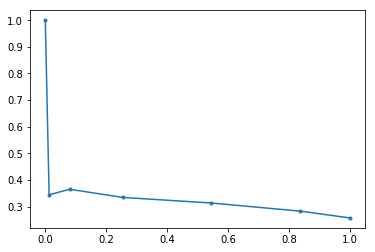

In [81]:
p.plot_precision_recall(pred_scores[:,1], y_test)

### EXPERIMENT WITH DIFFERENT PARAMETERS FOR THESE CLASSIFIERS

In [82]:
#1) Experiment with different parameters for these classifiers 
#(different values of k for example, as well as parameters that other classifiers have). 
#You should look at the sklearn documentation to see what parameter each classifier 
#can take and what the default values sklearn selects. The labs should be helpful here.

In [83]:
bagging = BaggingClassifier() # use the default parameters: base_estimator is a decision tree, n_estimators=10
bagging.fit(X_train_1, y_train_1)
pred_scores = bagging.predict_proba(X_test_1)

In [85]:
print("The true number of HBP is {}/{} from the testing data, with percentage {:.2f}%\n".format(
    sum(y_test), len(y_test), 100.*sum(y_test)/len(y_test)))
for threshold in np.linspace(0.1,0.7,7):
    pred_label = [1 if x[1]>threshold else 0 for x in pred_scores]
    print("(Threshold: {}), the total number of predicted HBP is {}, the accuracy is {:.2f}, the f1_score is {:.2f}".format(
        threshold, sum(pred_label), accuracy_score(pred_label,y_test), f1_score(y_test, pred_label)))
    print

The true number of HBP is 8431/32779 from the testing data, with percentage 25.72%

(Threshold: 0.1), the total number of predicted HBP is 24990, the accuracy is 0.42, the f1_score is 0.43
(Threshold: 0.2), the total number of predicted HBP is 19545, the accuracy is 0.52, the f1_score is 0.43
(Threshold: 0.3), the total number of predicted HBP is 14100, the accuracy is 0.60, the f1_score is 0.41
(Threshold: 0.4), the total number of predicted HBP is 9338, the accuracy is 0.66, the f1_score is 0.37
(Threshold: 0.5), the total number of predicted HBP is 5625, the accuracy is 0.70, the f1_score is 0.30
(Threshold: 0.6), the total number of predicted HBP is 2965, the accuracy is 0.72, the f1_score is 0.21
(Threshold: 0.7), the total number of predicted HBP is 1250, the accuracy is 0.74, the f1_score is 0.11


In [86]:
#based on runs above, threshold 4 is a good option - balance of accuracy and f_1

In [87]:
#now, let's use different models inside bagging
fpr, tpr, thresholds = roc_curve(y_test_1, pred_scores[:,1], pos_label=1)
print("The AUC under the original default setting of bagging is {:.3f}".format(auc(fpr, tpr)))

The AUC under the original default setting of bagging is 0.617


In [88]:
bagging = BaggingClassifier(base_estimator=LogisticRegression()) # use the default parameters: base_estimator is a decision tree, n_estimators=10
bagging.fit(X_train_1, y_train_1)
pred_scores = bagging.predict_proba(X_test_1)
fpr, tpr, thresholds = roc_curve(y_test_1, pred_scores[:,1], pos_label=1)
print("The AUC of bagging with Logistic Regression as base_estimator is {:.3f}".format(auc(fpr, tpr)))



The AUC of bagging with Logistic Regression as base_estimator is 0.603


In [89]:
#in this case, Logistic Regression does NOT improve the base estimator, as AUC goes down